In [28]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
stock_pairs = [('AAPL', 'MSFT'), ('GOOGL', 'AMZN'),
               ('TSLA', 'NVDA'), ('KO', 'PEP'), ('MCD', 'SBUX'),
               ('JNJ', 'PFE'), ('PG', 'UL'), ('V', 'MA'), ('XOM', 'CVX')]

start_date = '2020-01-01'
end_date = '2024-03-31'

results = {}

for pair in stock_pairs:
    stock_data_1 = yf.download(pair[0], start=start_date, end=end_date)['Adj Close']
    stock_data_2 = yf.download(pair[1], start=start_date, end=end_date)['Adj Close']
    
    data = pd.DataFrame({f'{pair[0]}_Close': stock_data_1,
                         f'{pair[1]}_Close': stock_data_2})
    
    data.dropna(inplace=True)
    
    max_lag = 5  
    test_result = grangercausalitytests(data, max_lag, verbose=False)
    
    results[pair] = test_result

for pair, result in results.items():
    print(f"Granger causality test results for {pair}:")
    for lag, stats in result.items():
        p_value = stats[0]['ssr_ftest'][1]  
        if p_value < 0.05:
            print(f"At lag {lag}, Granger causality is significant (p-value: {p_value})")
        else:
            print(f"At lag {lag}, Granger causality is not significant (p-value: {p_value})")
    print()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
[*********************

Granger causality test results for ('AAPL', 'MSFT'):
At lag 1, Granger causality is not significant (p-value: 0.18766742346003296)
At lag 2, Granger causality is not significant (p-value: 0.38439494264580554)
At lag 3, Granger causality is not significant (p-value: 0.5864617932431729)
At lag 4, Granger causality is not significant (p-value: 0.5069353385825848)
At lag 5, Granger causality is not significant (p-value: 0.3031195370099853)

Granger causality test results for ('GOOGL', 'AMZN'):
At lag 1, Granger causality is not significant (p-value: 0.6644747089744737)
At lag 2, Granger causality is not significant (p-value: 0.6672520288198642)
At lag 3, Granger causality is not significant (p-value: 0.8303775409499159)
At lag 4, Granger causality is not significant (p-value: 0.8295088421802642)
At lag 5, Granger causality is not significant (p-value: 0.7819677442093593)

Granger causality test results for ('TSLA', 'NVDA'):
At lag 1, Granger causality is not significant (p-value: 0.8545242


/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


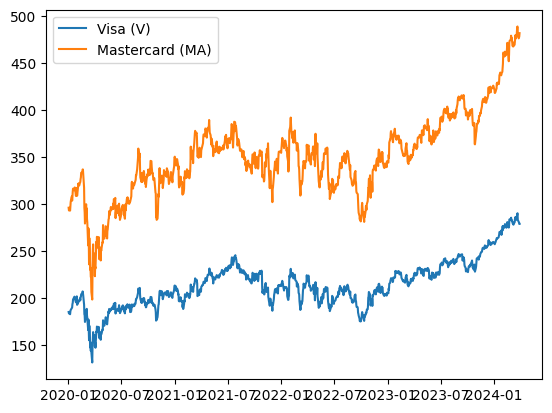

In [4]:
start_date = '2020-01-01'
end_date = '2024-03-31'

visa_data = yf.download('V', start=start_date, end=end_date)['Adj Close']
mastercard_data = yf.download('MA', start=start_date, end=end_date)['Adj Close']

plt.plot(visa_data, label='Visa (V)')
plt.plot(mastercard_data, label='Mastercard (MA)')
plt.legend()
plt.show()

In [8]:
visa_data.corr(mastercard_data)

0.9735869828774879

Trading Strategy - Mean reversion - Trade based on average price ration.
i.e. trade when ratio is less or more than average ratio.

In [11]:
price_ratio = visa_data / mastercard_data
avg_ratio = np.mean(price_ratio)
avg_ratio 


0.6135059666012854

Strategy testing - Backtesting 
Assume we buy 100 shares each time

In [64]:


profitList = []
countTrades = 0
for i in range(0, len(visa_data)):
    ratio = visa_data[i]/mastercard_data[i]
    if(ratio > avg_ratio):
        # buy Visa share
        profit = (visa_data[i+1] - visa_data[i]) * 100

        profitList.append(profit)
        countTrades += 1
sum(profitList)
countTrades
len(visa_data)

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_18426/1762937645.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio = visa_data[i]/mastercard_data[i]
/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_18426/1762937645.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profit = (visa_data[i+1] - visa_data[i]) * 100


11102.597045898438

509

1067

In [65]:
max(profitList)

1826.8905639648438

In [66]:
min(profitList)

-2315.9469604492188

Since we have a trade of loss of 2000$ make sure you use stop loss

In [67]:
# folloiwng is just a example - not a practical stop loss depiction

profitList = []
countTrades = 0
for i in range(0, len(visa_data)):
    ratio = visa_data[i]/mastercard_data[i]
    if(ratio > avg_ratio):
        # buy Visa share
        profit = (visa_data[i+1] - visa_data[i]) * 100

        if(profit < -300):
            profit = -300
        profitList.append(profit)
        countTrades += 1
sum(profitList)
countTrades
len(visa_data)

/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_18426/4206252435.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio = visa_data[i]/mastercard_data[i]
/var/folders/y8/mm_hx_9563jfv5g5r_w7kvxr0000gn/T/ipykernel_18426/4206252435.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profit = (visa_data[i+1] - visa_data[i]) * 100


30061.703491210938

509

1067